## <span style="color:blue">  Numerical exercises 8</span>

### Exercise 08.1

Write a Variational Monte Carlo code for a single quantum particle in 1D which exploits the Metropolis algorithm to sample the square modulus of our trial wave function $|\Psi_T^{\sigma,\mu}(x)|^2$ using an uniform transition probability $T(x_{new}|x_{old})$. By using data blocking, the code should be able to compute the expectation value for the Hamiltonian

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}
$$

which can be used to find the parameters that minimize this quantity. Use $\hbar = 1$ and $m=1$.
<span style="color:red">Note that to measure $\langle {\hat H} \rangle_T$ you need the analytical calculation of:</span>
    
$$
\frac{{-\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2}} \Psi_T^{\sigma,\mu}(x)}{\Psi_T^{\sigma,\mu}(x)}
$$

In [48]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams.update({'font.size': 15})

### Exercise 08.2

To find the parameters $\sigma$ and $\mu$ which minimize $\langle {\hat H} \rangle_T$, extend your Variational Monte Carlo code to face the variational optimization problem via a <span style="color:red">Simulated Annealing (SA) algorithm</span>.

Choose an appropriate starting temperature for your SA algorithm and an appropriate temperature-update-law to make the optimization work.

Compute $\langle {\hat H} \rangle_T$ with enough statistics in order to be able to measure the lowering of $\langle {\hat H} \rangle_T$ once the variational parameters are moved.

- <span style="color:red">Show a picture of $\langle {\hat H} \rangle_T$ (with statistical uncertainties) as a function of the SA steps of the algorithm</span>
- you could also show a picture of the trajectory of the SA algorithm in the variational parameter space as a function of the SA steps
- <span style="color:red">show a picture of the estimation of $\langle {\hat H} \rangle_T$ </span> and its statistical uncertainty as a function of the number of blocks/MC steps <span style="color:red">for the set of parameters which minimize $\langle {\hat H} \rangle_T$</span>
- <span style="color:red">show also a picture **of the sampled** $|\Psi_T(x)|^2$</span> by filling a histogram with the sampled configurations, moreover compare it with the analytic curve of $|\Psi_T(x)|^2$ and with the numerical solution obtained by transforming the Schrodinger equation into a matrix equation (see below the supplementary material).

### OPTIMIZATION

- We have to find best values of $\mu$ and $\sigma$ for the minimization of H, i used this parameters:
    - starting from $\mu_0 = 1$ , $\sigma_0=1$ , $x_0=0$
    - metropolis step = 5 (so $x_{new}$ will be extract from an interval between $[x_{old}-2.5,x_{old}+2.5]$)
    - optimization parameter of 0.1 (new values of mu (and sigma) will be extract from an interval $[\mu_{old}-0.05,\mu_{old}+0.05]$)
    - i chose a temperature range $[0,0.1]$ and i divided it into 200 range, for each range i made 5 repetitions of 10k metropolis step, this is to improve the optimization, because every repetition start from mu and sigma values that are better than the previous 

- In this plot i will show how the optimization works in a $\mu$, $\sigma$ space, not that the starting value is not (1,1) because the starting value here is after 5 repetition of 10k metropolis step for the starting temperature. The starting poin is (0.88,1.06)

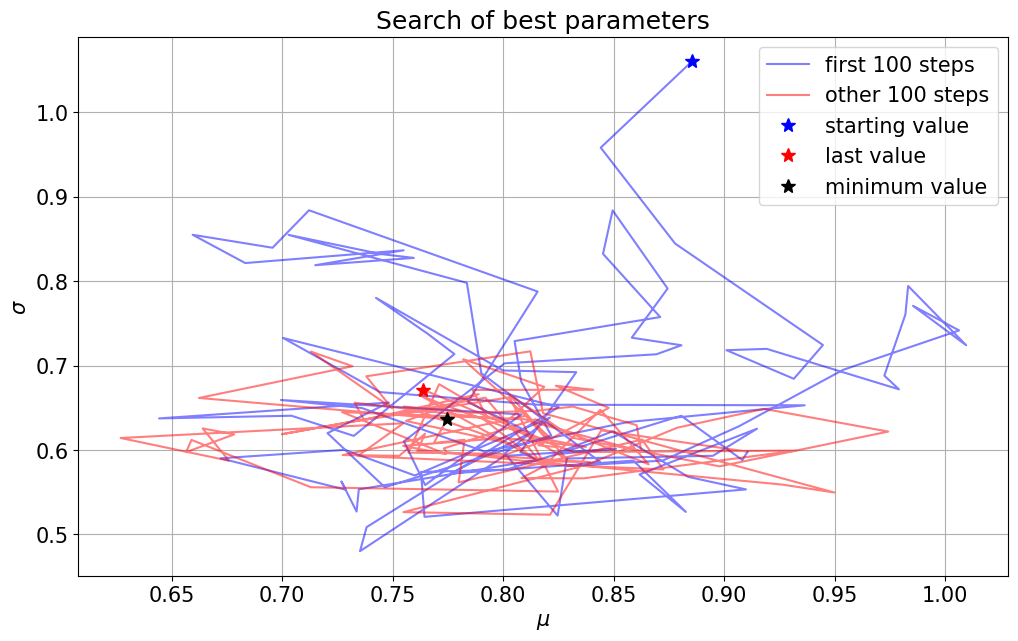

In [47]:
temp,mu, sigma, H = np.loadtxt("../c++/es 8/OUTPUT/Results.dat", usecols=(0,1,2,3), unpack = True)

fig = plt.figure( figsize = (12,7) )
plt.title("Search of best parameters")
plt.plot(mu[:100],sigma[:100], color = "blue", label = "first 100 steps",alpha=0.5)
plt.plot(mu[99:],sigma[99:], color = "red" , label = "other 100 steps",alpha=0.5)
plt.plot(mu[0] , sigma [0] , "*", color = 'blue' ,label = "starting value",markersize=10)
plt.plot(mu[-1] , sigma [-1] ,"*", color = 'red', label = "last value",markersize=10)
plt.plot(min_mu,min_sigma,"*", color = 'black',label = "minimum value",markersize=10)
plt.xlabel("$\mu$")
plt.ylabel("$\sigma$")
plt.grid()
plt.legend()
plt.show()

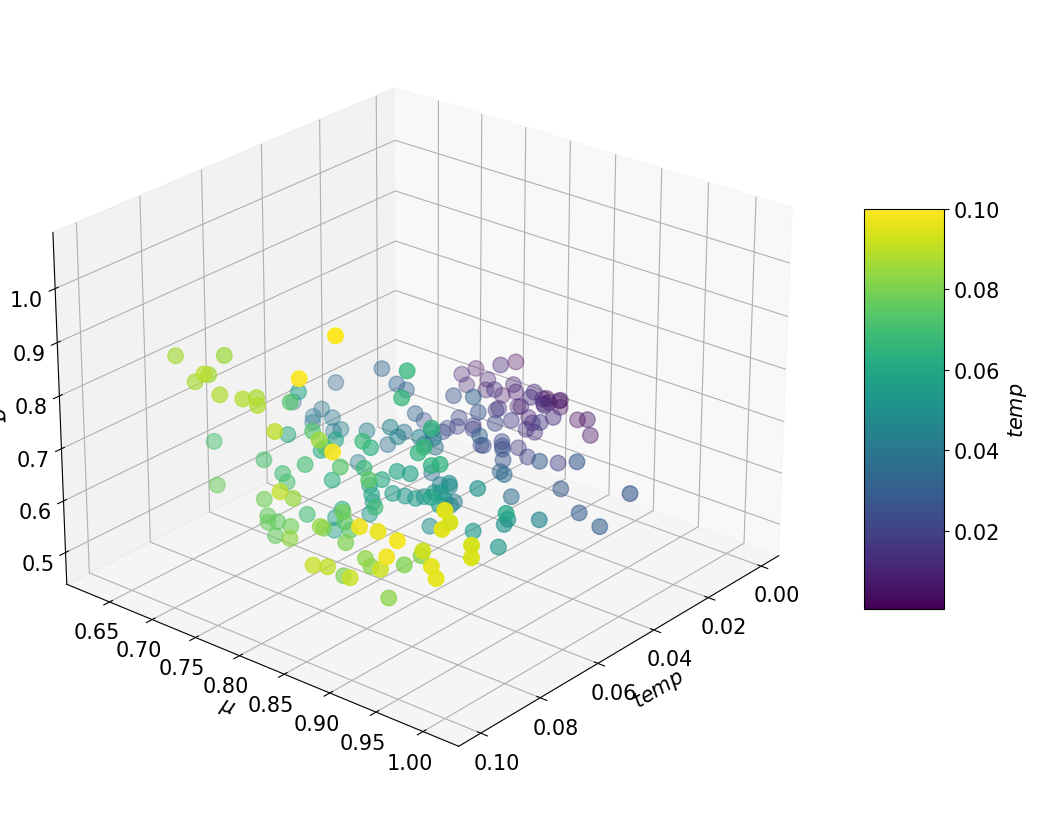

best variational parameters:  mu = 0.774685  sigma = 0.636572


In [66]:
temp,mu, sigma, H = np.loadtxt("../c++/es 8/OUTPUT/Results.dat", usecols=(0,1,2,3), unpack = True)

fig = plt.figure(figsize = (10, 8))

ax = Axes3D(fig , auto_add_to_figure=False)
fig.add_axes(ax)
sc = ax.scatter(temp,mu,sigma, c=temp, marker='.',s=500)
ax.set_xlabel('$temp$')
ax.set_ylabel('$\mu$')
ax.set_zlabel('$\sigma$')
ax.view_init(25, 40)

# Aggiunta della colorbar
cbar = plt.colorbar(sc, ax=ax, shrink=0.5, aspect=5)
cbar.set_label('$temp$')

plt.show()

min_mu    = mu[np.argsort(H)[0]]
min_sigma = sigma[np.argsort(H)[0]]

# Imposta la posizione del grafico all'interno della figura
box = ax.get_position()
ax.set_position([box.x0 + 2, box.y0+5, box.width+8, box.height+0.8])

print("best variational parameters:  mu =",min_mu , " sigma =",min_sigma )

- It is possible to see how the optimization works, darkest markers represent lower temperature, and they are more dense than the lighter markers that represent higher temperatures. This means that going on with the algorithm, we are closest to the best values of the parameters 

### $H_T$ REPRESENTATION

- I will show how is the $<H>$ value, in function of decreasing temperatures (SA steps)

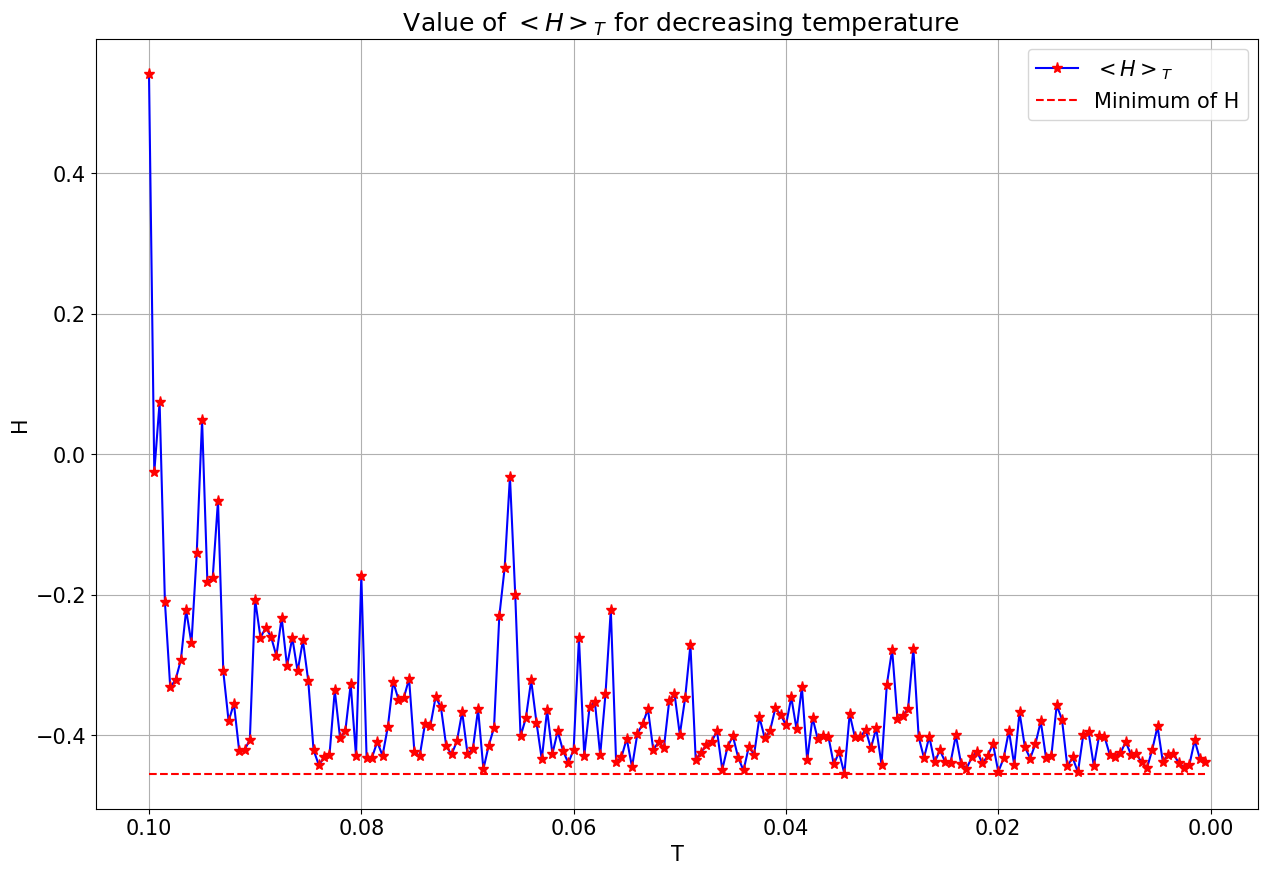

In [76]:
fig = plt.figure( figsize = (15,10) )
plt.plot(temp,H, label ="$<H>_{T}$", marker='*',color='blue', mec='red', mfc='red',ms=8)
plt.xlabel("T")
plt.ylabel("H")
plt.xlim( max(temp)+0.005 , min(temp)-0.005 ) 
plt.grid()
plt.hlines(min(H) ,max(temp), min(temp) , color = "red" , label = "Minimum of H" , ls="--")
plt.title(" Value of $<H>_{T}$ for decreasing temperature", size = 18 )
plt.legend()

plt.show()

### DATA BLOCKING

- I use 50 blocks of 10k steps each

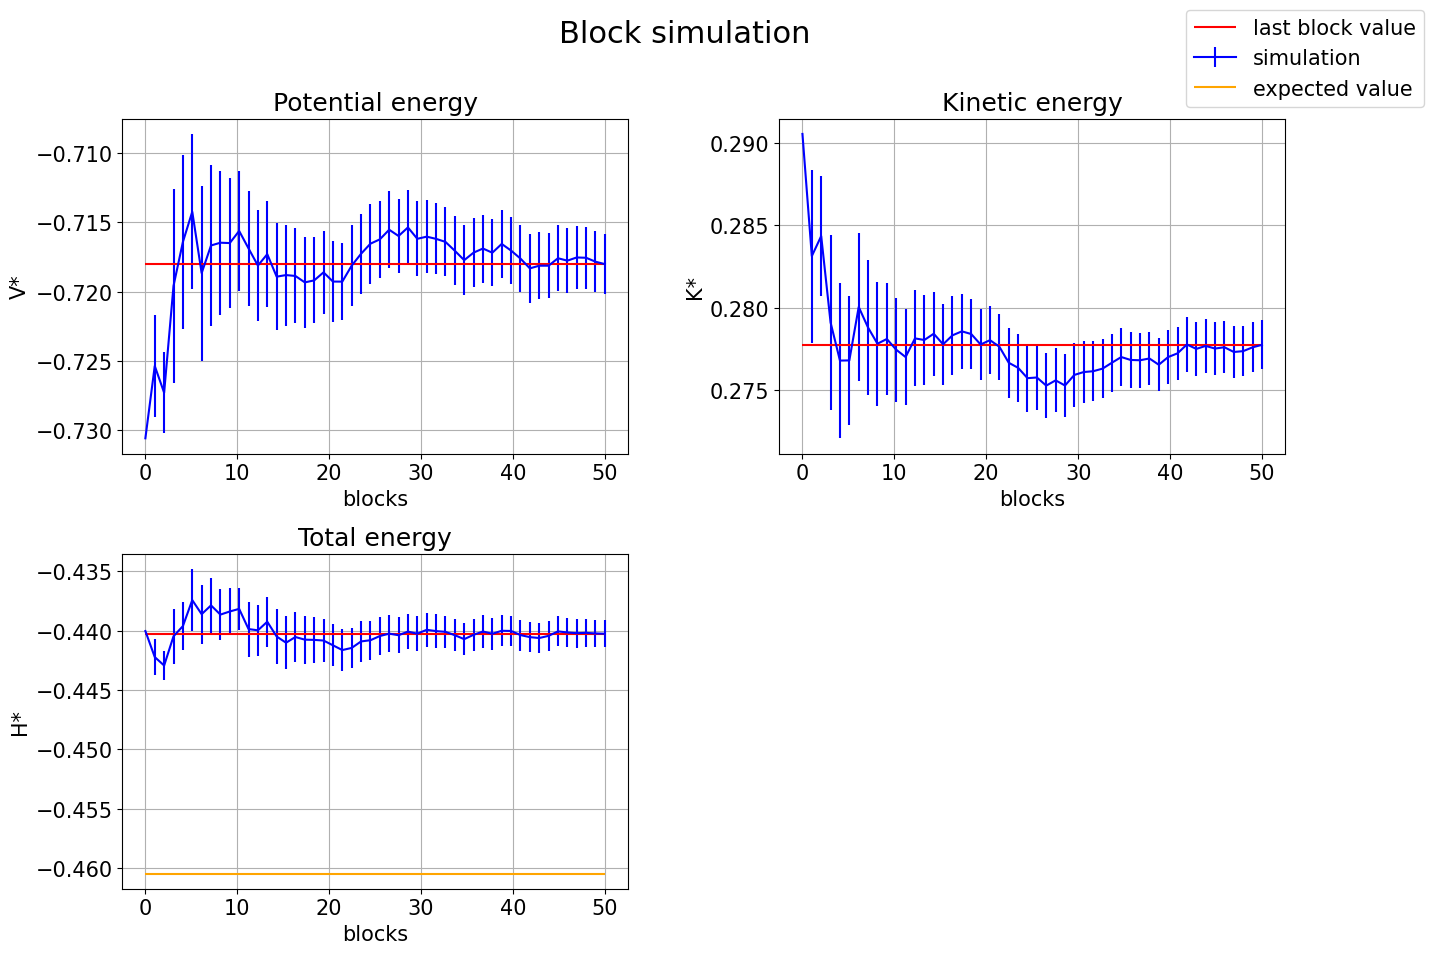

In [77]:
N_block = 50 #blocchi da 10k steps
x = np.linspace(0,N_block,N_block)
fig, axs = plt.subplots(2,2, figsize = (15,10) )
fig.suptitle("Block simulation", fontsize = (22))


ekin, error_ekin   = np.loadtxt("../c++/es 8/OUTPUT/Kinetic.dat",   usecols=(2,3), unpack = 'true')
pot, error_pot     = np.loadtxt("../c++/es 8/OUTPUT/Potential.dat", usecols=(2,3), unpack = 'true')
etot, error_etot   = np.loadtxt("../c++/es 8/OUTPUT/H.dat",     usecols=(2,3), unpack = 'true')

plt.subplot(2,2,1)
plt.errorbar(x,pot,yerr=error_pot, label = "simulation", color = "blue")
plt.title("Potential energy")
plt.xlabel("blocks")
plt.ylabel("V*")
plt.hlines(pot[-1] ,0 ,N_block, color = "red" , label = "last block value") 
plt.grid(True)

plt.subplot(2,2,2)
plt.errorbar(x,ekin,yerr=error_ekin, color = "blue")
plt.title("Kinetic energy")
plt.xlabel("blocks")
plt.ylabel("K*")
plt.hlines(ekin[-1] ,0 ,N_block, color = "red" )
plt.grid(True)

plt.subplot(2,2,3)
plt.errorbar(x,etot,yerr=error_etot, color = "blue")
plt.title("Total energy")
plt.xlabel("blocks")
plt.ylabel("H*")
plt.hlines(etot[-1] ,0 ,N_block, color = "red" ) 
plt.hlines(-0.4604658796923901,0,N_block, color = "orange",label="expected value" )
plt.grid(True)

plt.subplot(2,2,4)
plt.axis("off")
plt.subplots_adjust(wspace=0.3, hspace=0.3)


fig.legend( fontsize = 15)

plt.show()

- The expected value of the ground state is far away from the last block value 

Ground state energy:  -0.4604658796923901
1st excited state energy:  0.09742471331806084
2nd excited state energy:  1.9717331343935816


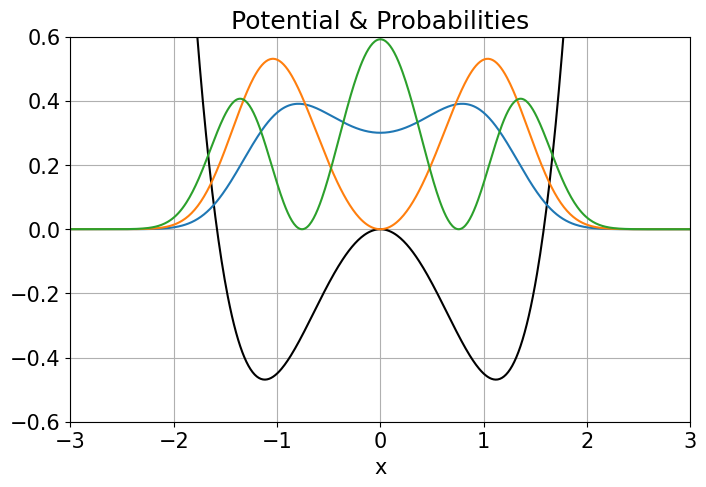

In [80]:
def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

print("Ground state energy: ", E[0])
print("1st excited state energy: ", E[1])
print("2nd excited state energy: ", E[2])

# Plot a few things
plt.figure(figsize=(8,5))
scale = 0.3
plt.plot(x, scale*V, color="Black", label="Potential") # plot the potential
plt.plot(x,(psi[0])**2)
plt.plot(x,(psi[1])**2)
plt.plot(x,(psi[2])**2)
plt.title("Potential & Probabilities")
plt.xlabel("x")
plt.grid(True)
plt.xlim((-3,3))
plt.ylim((-0.6,0.6))
plt.show()

### POSITION SAMPLING

- Now i will show how during the data blocking simulation, the particle position follows the wave function
- the grey histogram represents the simulation 

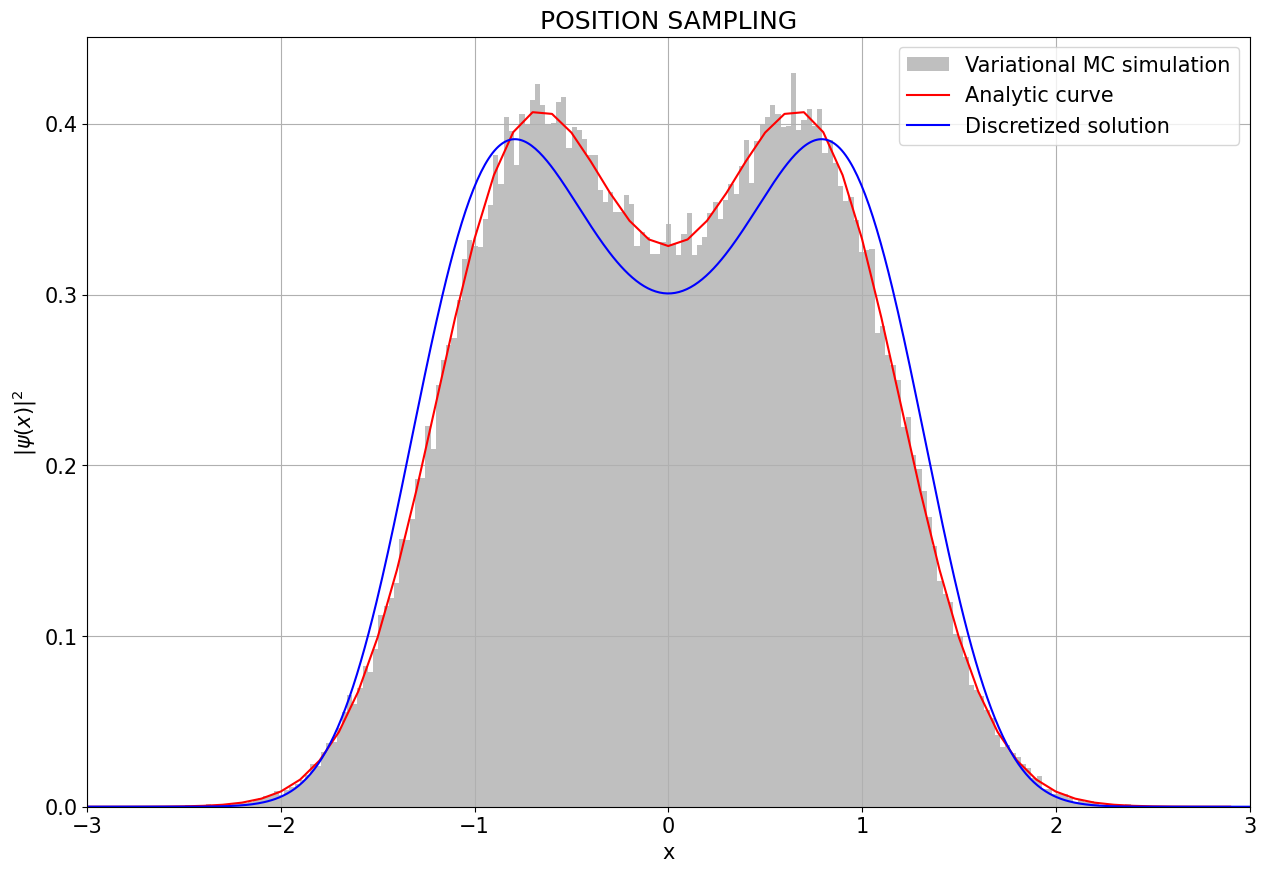

In [79]:
traj = np.loadtxt("../c++/es 8/OUTPUT/traj.dat", usecols=(0), unpack = True)
z = np.arange(-3,3 , step = 0.1)

def psi2_an(x, mu , sigma):
    a = (x-mu)/sigma
    b = (x+mu)/sigma
    norm = 2*np.sqrt(np.pi) *sigma*(1 + np.exp(-(mu/sigma)**2)) 
    return (np.exp(-0.5*( a**2) ) + np.exp(-0.5* b**2))**2 /norm


fig = plt.figure(figsize = (15,10))
plt.hist(traj, 200, density = 'true' , alpha = 0.5, label = "Variational MC simulation", color="grey")
plt.plot(z,psi2_an(z,min_mu,min_sigma) , label = "Analytic curve", color="red")
plt.plot(x,(psi[0])**2, label = "Discretized solution", color="blue")
plt.legend()
plt.xlim(-3,3)
plt.grid(True)
plt.xlabel("x")
plt.ylabel("$|\psi(x)|^2 $" )
plt.title("POSITION SAMPLING")

plt.show()